In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from numpy import NaN, nan, NAN

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics


import warnings
warnings.filterwarnings(action='ignore')

In [15]:
bank = pd.read_csv('data/bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [35]:
# 각 컬럼별 널의 개수 출력
# bank.info()
bank.isnull().sum()

# 기술통계
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


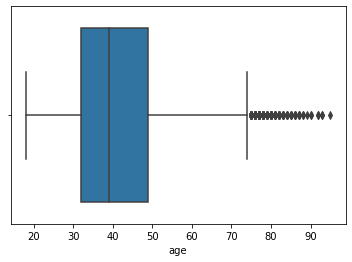

In [59]:
# 
sns.boxplot(x = bank.age)

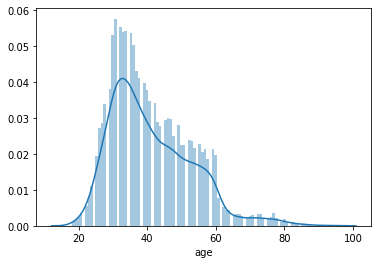

In [55]:
sns.distplot(bank.age, bins=100)

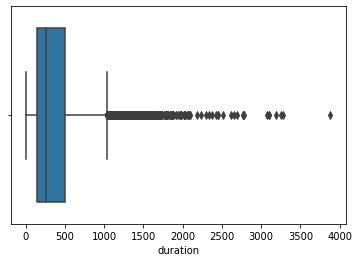

In [56]:
sns.boxplot(x = bank.duration)

In [60]:
# Convert categorical data
bankData = bank.copy()

In [80]:
# bankData.info()
bankData.columns

bankData.groupby(bankData.job).size()
bankData.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [87]:
# deposit이 yes인 데이터에 한해서 개수를 출력 
bankData[bankData.deposit == 'yes'].job.value_counts()
bankData[bankData.deposit == 'yes'].groupby(bankData.job).size()

job
admin.            631
blue-collar       708
entrepreneur      123
housemaid         109
management       1301
retired           516
self-employed     187
services          369
student           269
technician        840
unemployed        202
unknown            34
dtype: int64

In [242]:
# management , admin. => white-collar
# services, housemaid => pink-collar
# retired, student, unemployed, unknown => other

bankData['job'] = bankData['job'].replace(['management','admin.'],'white-collar')
bankData['job'] = bankData['job'].replace(['services','housemaid'],'pink-collar')
bankData['job'] = bankData['job'].replace(['retired','student','unemployed','unknown'],'other')

bankData['job'].value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [112]:
bankData.poutcome.value_counts()
bankData.poutcome = bankData.poutcome.replace('other','unknown')
bankData.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [159]:
bankData.contact.value_counts()
bankData.drop('contact', axis=1, inplace=True)

In [148]:
bankData.default.value_counts() #no     10994  / yes      168
# -> 'yes':1, 'no':0

# map 함수 이용
bankData['default_cat'] = bankData['default'].map({'yes':1, 'no':0})

# 기존 컬럼 제거
bankData.drop('default',axis=1, inplace=True)

In [151]:
bankData['housing'].value_counts()

# map 함수 이용
bankData['housing_cat'] = bankData['housing'].map({'yes':1, 'no':0})

# 기존 컬럼 제거
bankData.drop('housing',axis=1, inplace=True)

In [155]:
bankData['loan'].value_counts()

# map 함수 이용
bankData['loan_cat'] = bankData['loan'].map({'yes':1, 'no':0})

# 기존 컬럼 제거
bankData.drop('loan',axis=1, inplace=True)

In [162]:
# month, day컬럼 제거
bankData.drop(['day','month'],axis = 1, inplace = True)

In [164]:
bankData['deposit'].value_counts()

# map 함수 이용
bankData['deposit_cat'] = bankData['deposit'].map({'yes':1, 'no':0})

# 기존 컬럼 제거
bankData.drop('deposit',axis=1, inplace=True)

In [178]:
len(bankData[bankData['pdays'] == -1])  # 8324

bankData['pdays'].max()  # 854

854

In [204]:
# pdays 값이 -1인 행을 10000으로 변경
bankData['pdays'][bankData['pdays'] == -1] = 10000

bankData['pdays'] = np.where(bankData['pdays'] == -1, 10000, bankData['pdays'])

In [208]:
# 숫자가 클 수록 이전 응대 날짜가 가까운것으로 표현
bankData['recent_pdays'] = np.where(bankData['pdays'], 1/bankData['pdays'], 1/bankData['pdays'])

In [210]:
# 기존 pdays 컬럼 삭제
bankData.drop('pdays', axis=1, inplace=True)

In [212]:
bankData.tail()

,age,job,marital,education,balance,duration,campaign,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
11157,33,blue-collar,single,primary,1,257,1,0,unknown,0,1,0,0,0.000100
11158,39,pink-collar,married,secondary,733,83,4,0,unknown,0,0,0,0,0.000100
11159,32,technician,single,secondary,29,156,2,0,unknown,0,0,0,0,0.000100
11160,43,technician,married,secondary,0,9,2,5,failure,0,0,1,0,0.005814
11161,34,technician,married,secondary,0,628,1,0,unknown,0,0,0,0,0.000100


In [243]:
bankWithDummies = pd.get_dummies(bankData, columns=['job','marital','education','poutcome'])

In [219]:
bankWithDummies.head()
bankWithDummies.shape  # 11162, 28
bankWithDummies.describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_student,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,0.832557,0.015051,0.473123,0.130801,0.473840,0.003124,0.174162,0.029385,0.107956,0.107239,0.036284,0.032252,0.163322,0.349400,0.115839,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.110016,0.095951,0.794033
std,11.913369,3225.413326,347.128386,2.722077,2.292007,0.121761,0.499299,0.337198,0.499338,0.030686,0.379266,0.168892,0.310338,0.309431,0.187004,0.176677,0.369676,0.476802,0.320047,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.312924,0.294537,0.404424
min,18.000000,-6847.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,550.000000,255.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,1708.000000,496.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.001919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


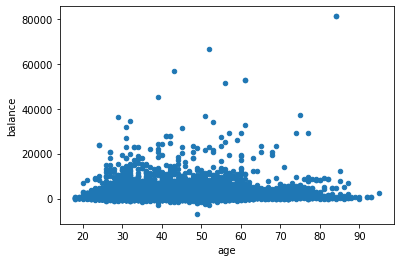

In [220]:
bankWithDummies.plot(kind='scatter', x='age', y='balance')

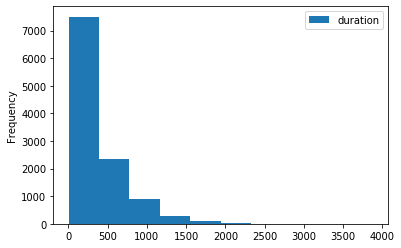

In [222]:
bankWithDummies.plot(kind='hist', x='poutcome_success', y='duration')

In [225]:
# 계약 기간이 만료된 사람들
bankWithDummies[bankWithDummies.deposit_cat == 1].describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_student,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,0.009832,0.365854,0.091511,1.0,0.004238,0.133863,0.023256,0.142182,0.090376,0.035356,0.050860,0.158820,0.365286,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.184912,0.698242
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.098676,0.481714,0.288361,0.0,0.035686,0.340537,0.150729,0.349270,0.286747,0.184696,0.219733,0.365543,0.481556,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.388263,0.459064
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.005128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [235]:
bankWithDummies.deposit_cat
bankWithDummies.loan_cat    # 개인 대출
bankWithDummies.housing_cat # 주택 대출

bankWithDummies[(bankWithDummies.deposit_cat == 1) & (bankWithDummies.loan_cat == 1) & (bankWithDummies.housing_cat == 1)]
# 265 명

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_student,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
5,42,0,562,2,0,0,1,1,1,0.000100,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1
6,56,830,1201,1,0,0,1,1,1,0.000100,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1
12,29,199,1689,4,0,0,1,1,1,0.000100,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1
19,49,168,513,1,0,0,1,1,1,0.000100,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1
40,60,1262,1015,1,0,0,1,1,1,0.000100,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5223,51,5350,612,4,0,0,1,1,1,0.000100,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
5237,24,-389,1242,1,0,0,1,1,1,0.000100,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
5239,39,25,658,1,3,0,1,1,1,0.002849,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
5253,31,-537,1039,7,0,0,1,1,1,0.000100,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


In [239]:
# deposit_cat = 1 , default_cat = 1 
# 정기예금에 가압하고 채무불이행한 사람
len(bankWithDummies[(bankWithDummies['deposit_cat'] == 1) & (bankWithDummies['default_cat'] == 1)])  # 52 명

52

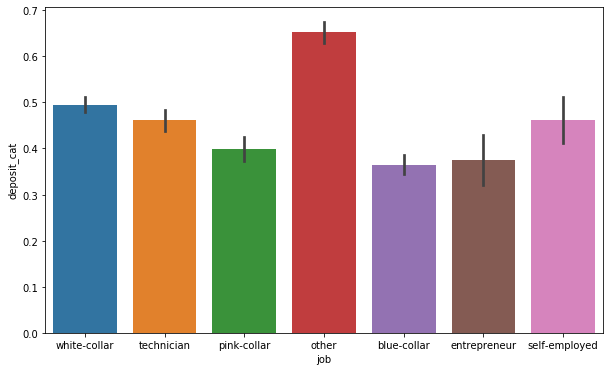

In [244]:
# 직업별 정기저축 가입 비율
plt.figure(figsize=(10,6))
sns.barplot(x='job', y='deposit_cat', data=bankData)

In [246]:
bankwd = bankWithDummies

In [248]:
# 상관계수 조사
corr = bankwd.corr()
corr

# 숫자로 표현되다보니 한 눈에 보기 불편 => 히트맵

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,0.112300,0.000189,-0.005278,0.020169,-0.011425,-0.168700,-0.031418,0.034901,0.019102,-0.066567,0.024176,0.296418,-0.027942,-0.023163,-0.082716,-0.080122,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992
balance,0.112300,1.000000,0.022436,-0.013894,0.030805,-0.060954,-0.077092,-0.084589,0.081129,-0.004379,-0.046220,0.005039,0.050744,-0.041063,0.020264,0.003802,0.013780,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524
duration,0.000189,0.022436,1.000000,-0.041557,-0.026716,-0.009760,0.035051,-0.001914,0.451919,-0.014868,0.029986,-0.000908,0.010680,0.005345,0.013506,-0.010440,-0.031980,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.049699,0.030975,0.006660,0.034722,-0.128081,-0.026296,0.005522,0.013883,-0.050212,0.011958,0.001776,0.021738,0.001944,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907
previous,0.020169,0.030805,-0.026716,-0.049699,1.000000,-0.035273,-0.000840,-0.022668,0.139867,0.122076,-0.039939,-0.022470,0.031191,-0.028623,-0.002338,0.002035,0.034929,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921
default_cat,-0.011425,-0.060954,-0.009760,0.030975,-0.035273,1.000000,0.011076,0.076434,-0.040680,-0.011290,0.022779,0.022060,-0.018130,-0.007173,0.007493,0.003109,-0.013425,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403
housing_cat,-0.168700,-0.077092,0.035051,0.006660,-0.000840,0.011076,1.000000,0.076761,-0.203888,-0.029350,0.189848,0.011492,-0.233309,0.043884,-0.016903,0.006551,-0.012111,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375
loan_cat,-0.031418,-0.084589,-0.001914,0.034722,-0.022668,0.076434,0.076761,1.000000,-0.110580,-0.012697,0.057956,0.042631,-0.096196,0.014969,0.004299,0.006864,-0.007871,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686
deposit_cat,0.034901,0.081129,0.451919,-0.128081,0.139867,-0.040680,-0.203888,-0.110580,1.000000,0.034457,-0.100840,-0.034443,0.144408,-0.051717,-0.004707,-0.011557,0.031621,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.286642,-0.224785
recent_pdays,0.019102,-0.004379,-0.014868,-0.026296,0.122076,-0.011290,-0.029350,-0.012697,0.034457,1.000000,-0.018514,0.006251,0.024356,-0.001183,-0.008226,-0.007412,0.004516,-0.020253,0.009583,0.003736,-0.007034,-0.017129,0.017346,0.013590,0.051422,0.119598,-0.126890


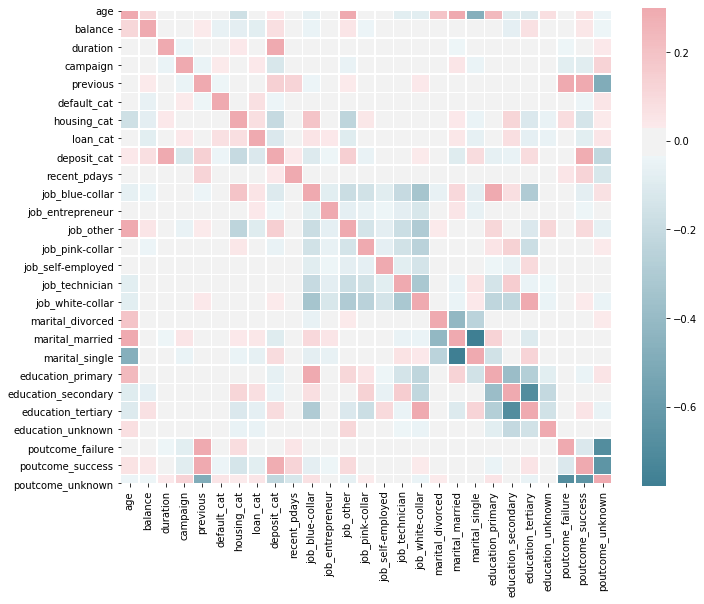

In [269]:
plt.figure(figsize=(11,11))

cmap = sns.diverging_palette(220,10, as_cmap = True)

sns.heatmap(corr,cmap = cmap, linewidths=.5, square= True, center=0, vmax=.3, cbar_kws={'shrink':.80})

In [299]:
corr_deposit = pd.DataFrame(corr['deposit_cat'].drop('deposit_cat'))
corr_deposit
# deposit_cat 기준으로 내림차순
corr_deposit = corr_deposit.sort_values(by='deposit_cat', ascending=False)
corr_deposit

,deposit_cat
duration,0.451919
poutcome_success,0.286642
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
age,0.034901
recent_pdays,0.034457
job_white-collar,0.031621


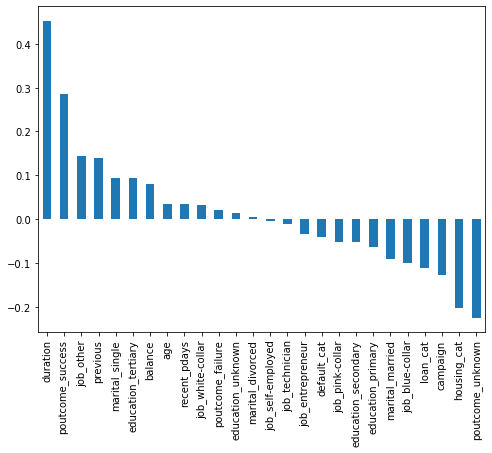

In [309]:
plt.figure(figsize=(8,6))
corr_deposit['deposit_cat'].plot('bar')

In [330]:
## 의사결정트리 만들기

## 모델
# X, Y 나누기
dropDeposit = bankwd.drop('deposit_cat', axis=1)  # 입력변수
label = bankwd.deposit_cat                       # 출력변수

# 트레인 테스트셋 나누기
dataTrain, dataTest, lableTrain, lableTest = train_test_split(dropDeposit,label,train_size = 0.2, random_state=42)

# 모델객체 생성
dt2 = tree.DecisionTreeClassifier(max_depth=2)

# 모델 fit
dt2.fit(dataTrain, lableTrain)

dt2_sc_train = dt2.score(dataTrain, lableTrain)
dt2_sc_test = dt2.score(dataTest, lableTest)

In [331]:
print('트레이닝 스코어',dt2_sc_train)
print('테스트 스코어',dt2_sc_test)

트레이닝 스코어 0.7670250896057348
테스트 스코어 0.7530795072788354


In [375]:
# 3, 4, 5, 6, 10, 생략
depth = [3,4,5,6,7,8,9,10]
for i in range(len(depth)) :
    # 모델객체 생성
    dt2 = tree.DecisionTreeClassifier(max_depth = depth[i])

    # 모델 fit
    dt2.fit(dataTrain, lableTrain)

    dt2_sc_train = dt2.score(dataTrain, lableTrain)
    dt2_sc_test = dt2.score(dataTest, lableTest)
    
    print('depth : ',depth[i])
    print('트레이닝 스코어',dt2_sc_train)
    print('테스트 스코어',dt2_sc_test)
    

depth :  3
트레이닝 스코어 0.7732974910394266
테스트 스코어 0.7559910414333707
depth :  4
트레이닝 스코어 0.7885304659498208
테스트 스코어 0.7698768197088466
depth :  5
트레이닝 스코어 0.8104838709677419
테스트 스코어 0.7797312430011198
depth :  6
트레이닝 스코어 0.831989247311828
테스트 스코어 0.7848824188129899
depth :  7
트레이닝 스코어 0.849910394265233
테스트 스코어 0.7862262038073908
depth :  8
트레이닝 스코어 0.8691756272401434
테스트 스코어 0.7795072788353863
depth :  9
트레이닝 스코어 0.885752688172043
테스트 스코어 0.7733482642777155
depth :  10
트레이닝 스코어 0.9054659498207885
테스트 스코어 0.7631578947368421


In [374]:
## depth = default
# 모델객체 생성  
dt2 = tree.DecisionTreeClassifier()

# 모델 fit
dt2.fit(dataTrain, lableTrain)

dt2_sc_train = dt2.score(dataTrain, lableTrain)
dt2_sc_test = dt2.score(dataTest, lableTest)

print('트레이닝 스코어',dt2_sc_train)
print('테스트 스코어',dt2_sc_test)

dt2.get_depth()

트레이닝 스코어 1.0
테스트 스코어 0.7245240761478163


20

In [3]:
# 타이타닉 데이터셋
# 생존여부 (출력변수)
# 의사결정나무로 구해보기

df = sns.load_dataset('titanic')
df

df.drop(['who','adult_male','deck','embark_town','alive', 'class','alone'], axis=1, inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [4]:
## 데이터 전처리
df.isnull().sum()

# 결측치 구하기

# age            177
# embarked         2

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [5]:
# 결측치 제거
# age컬럼은 평균값으로 대체
df['age'][df['age'].isnull()] = df['age'].mean()

# embarked 컬럼의 결측치 2행 제거
df = df.dropna()

In [6]:
df
# sex : male = 0 / female = 1
df['sex'] = np.where(df['sex']=='male',0,1)
df['sex'].value_counts()

0    577
1    312
Name: sex, dtype: int64

In [7]:
dfDummies = pd.get_dummies(data=df, columns=['embarked'])
dfDummies

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,0,3,0,22.000000,1,0,7.2500,0,0,1
1,1,1,1,38.000000,1,0,71.2833,1,0,0
2,1,3,1,26.000000,0,0,7.9250,0,0,1
3,1,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,0,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,0,1
887,1,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,1,29.699118,1,2,23.4500,0,0,1
889,1,1,0,26.000000,0,0,30.0000,1,0,0


In [8]:
label = dfDummies['survived']
data = dfDummies.drop('survived', axis = 1)

In [9]:
## 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3, random_state = 777)
X_train, X_test, y_train, y_test

(     pclass  sex        age  sibsp  parch      fare  embarked_C  embarked_Q  \
 91        3    0  20.000000      0      0    7.8542           0           0   
 250       3    0  29.699118      0      0    7.2500           0           0   
 623       3    0  21.000000      0      0    7.8542           0           0   
 215       1    1  31.000000      1      0  113.2750           1           0   
 57        3    0  28.500000      0      0    7.2292           1           0   
 ..      ...  ...        ...    ...    ...       ...         ...         ...   
 72        2    0  21.000000      0      0   73.5000           0           0   
 600       2    1  24.000000      2      1   27.0000           0           0   
 572       1    0  36.000000      0      0   26.3875           0           0   
 816       3    1  23.000000      0      0    7.9250           0           0   
 104       3    0  37.000000      2      0    7.9250           0           0   
 
      embarked_S  
 91            1  


In [476]:
for i in range(1,10) :
    model = tree.DecisionTreeClassifier(max_depth=i)
    
    model.fit(X_train,y_train)
    
    train_sc = model.score(X_train, y_train)
    test_sc = model.score(X_test, y_test)
    
    print('depth : ', i)
    print('트레인 스코어 : ', train_sc)
    print('테스트 스코어 : ', test_sc)
    
# depth :  7
# 트레인 스코어 :  0.89
# 테스트 스코어 :  0.77

depth :  1
트레인 스코어 :  0.7942122186495176
테스트 스코어 :  0.7677902621722846
depth :  2
트레인 스코어 :  0.8070739549839229
테스트 스코어 :  0.7677902621722846
depth :  3
트레인 스코어 :  0.837620578778135
테스트 스코어 :  0.7902621722846442
depth :  4
트레인 스코어 :  0.8440514469453376
테스트 스코어 :  0.7940074906367042
depth :  5
트레인 스코어 :  0.8520900321543409
테스트 스코어 :  0.7715355805243446
depth :  6
트레인 스코어 :  0.8713826366559485
테스트 스코어 :  0.7827715355805244
depth :  7
트레인 스코어 :  0.8922829581993569
테스트 스코어 :  0.7790262172284644
depth :  8
트레인 스코어 :  0.9115755627009646
테스트 스코어 :  0.7715355805243446
depth :  9
트레인 스코어 :  0.927652733118971
테스트 스코어 :  0.7677902621722846


In [12]:
model = tree.DecisionTreeClassifier(max_depth=6)

model.fit(X_train,y_train)

train_sc = model.score(X_train, y_train)
test_sc = model.score(X_test, y_test)

print('depth : ', 6)
print('트레인 스코어 : ', train_sc)
print('테스트 스코어 : ', test_sc)

depth :  6
트레인 스코어 :  0.8713826366559485
테스트 스코어 :  0.7865168539325843


In [14]:
prediction = model.predict(X_test)

res = pd.read_csv('data/titanic/gender_submission.csv')
res['Survived'] = prediction
res

res.to_csv('res.csv', index=False)

ValueError: Length of values does not match length of index